In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
import os
import numpy as np
import pandas as pd

%matplotlib inline

from scipy import stats, integrate

sns.set(color_codes=True)

# Read File

In [34]:
file =r"C:\Users\gisel\Desktop\Cyber-master\final UN concatenate.csv"
df = pd.read_csv(file, encoding = "ISO-8859-1")
country_list = df['Country'].unique()

In [35]:
#Select Country
print('Choose a country:\n\n 1. Afghanistan'+'\n','2. Albania'+'\n','3. Australia'+'\n','4. Austria'+'\n',
      '5. Azerbaijan'+'\n','6. Bangladesh'+'\n','7. Bosnia Herzegovina'+'\n','8. Brazil'+'\n',
      '9. Chile\n','10. China\n','11. Colombia\n', '12. Croatia\n', '13. CR\n', '14. Cyprus\n', '15. Czech\n', 
      '16. Danish\n', '17. Denmark\n','18. Egypt\n', '19. Estonia\n', '20. Finland\n', '21. France\n', '22. Georgia\n', 
      '23. Germany\n','24. Ghana\n', '25. Greek\n', '26. Hungary\n', '27. Iceland\n', '28. India\n', '29. Ireland\n',
       '30. Israel\n', '31. Jamaica\n', '32. Jordan\n', '33. Kenya\n', '34. Latvia\n', '35. Lithuania\n','36. Luxembourg\n',
      '37. LUXEMBOURG\n', '38. Malawi\n','39. Malaysia\n', '40. Malta\n','41. Mauritania\n', '42. Micronesia\n', 
      '43. Mita \n', '44. Moldova\n', '45. Montenegro\n','46. Morocco\n', '47. Netherlands\n', '48. NewZealand\n', 
      '49. Nigeria\n', '50. Norway\n','51. New Zealand\n', '52. Panama\n', '53. Philippine\n', '54. Poland\n', 
      '55. Portuguese\n','56. Qatar\n', '57. Romania\n', '58. Russia\n', '59. Rwanda\n', '60. SaudiArabia\n', '61. Serbia\n',
       '62. Singapore\n', '63. Slovakia\n', '64. SLOVAKIA\n', '65. Slovenia\n', '66. SouthAfrica\n','67. Spain\n', 
      '68. Sweden\n', '69. Switzerland\n', '70. Trinidad Tobago\n', '71. Turkey\n','72. Uganda\n', '73. UK\n',
      '74. UnitedStates\n')
select_index = input("Which one you want to: ")
country_selected = country_list[int(select_index)-1]
print('\n Your selected country is: ', country_selected)

Choose a country:

 1. Afghanistan
 2. Albania
 3. Australia
 4. Austria
 5. Azerbaijan
 6. Bangladesh
 7. Bosnia Herzegovina
 8. Brazil
 9. Chile
 10. China
 11. Colombia
 12. Croatia
 13. CR
 14. Cyprus
 15. Czech
 16. Danish
 17. Denmark
 18. Egypt
 19. Estonia
 20. Finland
 21. France
 22. Georgia
 23. Germany
 24. Ghana
 25. Greek
 26. Hungary
 27. Iceland
 28. India
 29. Ireland
 30. Israel
 31. Jamaica
 32. Jordan
 33. Kenya
 34. Latvia
 35. Lithuania
 36. Luxembourg
 37. LUXEMBOURG
 38. Malawi
 39. Malaysia
 40. Malta
 41. Mauritania
 42. Micronesia
 43. Mita 
 44. Moldova
 45. Montenegro
 46. Morocco
 47. Netherlands
 48. NewZealand
 49. Nigeria
 50. Norway
 51. New Zealand
 52. Panama
 53. Philippine
 54. Poland
 55. Portuguese
 56. Qatar
 57. Romania
 58. Russia
 59. Rwanda
 60. SaudiArabia
 61. Serbia
 62. Singapore
 63. Slovakia
 64. SLOVAKIA
 65. Slovenia
 66. SouthAfrica
 67. Spain
 68. Sweden
 69. Switzerland
 70. Trinidad Tobago
 71. Turkey
 72. Uganda
 73. UK
 74. Uni

# Category Distribution of selected country

In [54]:
# filter country selected
df_country = df[df['Country'] == country_selected]
df_country = df_country[df_country['category'] != 'category unknown']

df_count = df_country['Sentence'].groupby(df['category'])\
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
print('Country:', country_selected)
print(df_count)

Country: Finland
                  category  count
4  ORGANIZATION MEASURES    167  
5  TECHNICAL MEASURES       130  
3  LEGAL MEASURES           66   
0  CAPACITY BUILDING        27   
2  COOPERATION              24   
1  CHILD ONLINE PROTECTION  3    


Display chart of category distribution

Country: Finland


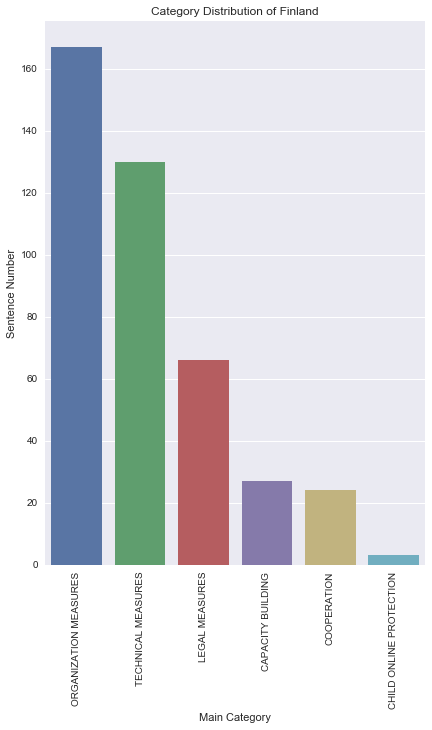

In [55]:
plt.figure(figsize=(15, 10))
# Type_1 的数量统计图
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='category', data=df_country,order = df_country['category'].value_counts().index)

plt.title('Category Distribution of '+country_selected)
plt.xticks(rotation='vertical')
plt.xlabel('Main Category')
plt.ylabel('Sentence Number')
print('Country:', country_selected)

# Choose a category you are intrested in

Display related sentences

In [56]:
def display_sentence(input_df,country_selected,selected_category):
    selected_df=input_df.filter(items=['Sentence ID','Sentence','sub category'])
    print('\n\n','Selected Country:  ',country_selected)
    pd.set_option('display.max_colwidth', -1) 
    print(' Selected Category: ',selected_category)
    print(' Number of Sentences: ',len(selected_df))
    return selected_df

In [57]:
category_list = ['LEGAL MEASURES','CAPACITY BUILDING','TECHNICAL MEASURES','COOPERATION','CHILD ONLINE PROTECTION','ORGANIZATION MEASURES']
print(' 1. LEGAL MEASURES','\n','2. CAPACITY BUILDING','\n', '3. TECHNICAL MEASURES','\n',
      '4. COOPERATION','\n','5. CHILD ONLINE PROTECTION','\n', '6. ORGANIZATION MEASURES','\n')
selected_index = input('Choose a category you are interested in:')
selected_category = category_list[int(selected_index)-1]
print('Selected Category:\n',selected_category)

 1. LEGAL MEASURES 
 2. CAPACITY BUILDING 
 3. TECHNICAL MEASURES 
 4. COOPERATION 
 5. CHILD ONLINE PROTECTION 
 6. ORGANIZATION MEASURES 

Choose a category you are interested in:6
Selected Category:
 ORGANIZATION MEASURES


# Sub-category Distribution of selected category of the country

In [60]:
print('Country:', country_selected)
print('Category:', selected_category)

# filter category selected
df_country = df[df['Country'] == country_selected]

#filter subcategory selected
df_sub_country = df_country[df_country['category'] == selected_category]
df_sub_country = df_sub_country[df_sub_country['sub category'] != 'category unknown']

#Sub-Category Count
subCat_counts = df_sub_country['Sentence'].groupby(df_sub_country['sub category'])
subCat_counts.size()

Country: Finland
Category: ORGANIZATION MEASURES


sub category
NATIONAL BENCHMARKING     82
POLICY                    19
RESPONSIBLE AGENCY        8 
ROADMAP FOR GOVERNANCE    58
Name: Sentence, dtype: int64

Country: Finland
Category: ORGANIZATION MEASURES


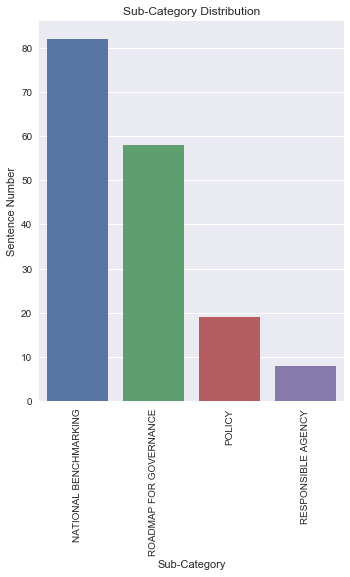

In [62]:


#Chart display
plt.figure(figsize=(12, 7))

ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='sub category', data=df_sub_country,order = df_sub_country['sub category'].value_counts().index )

plt.title('Sub-Category Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Sub-Category')
plt.ylabel('Sentence Number')
print('Country:', country_selected)
print('Category:', selected_category)

In [53]:
input_df = df_country[df_country['category'] == selected_category]
display_sentence(input_df,country_selected,selected_category)



 Selected Country:   Finland
 Selected Category:  ORGANIZATION MEASURES
 Number of Sentences:  167


,Sentence ID,Sentence,sub category
15613,270210,www.yhteiskunnanturvallisuus.fi/en,ROADMAP FOR GOVERNANCE
15622,270306,"Society¡¯s growing information intensity, the increase of foreign ownership and out- sourcing, integration between information and communications technologies, the use of open networks as well as the growing reliance on electricity have set totally new require- ments for securing society¡¯s vital functions in normal conditions, during serious distur- bances in normal conditions and in emergency conditions.",NATIONAL BENCHMARKING
15623,270307,"Threats against the cyber domain have increasingly serious repercussions for individ- uals, businesses and society in general.",POLICY
15624,270308,The perpetrators are more professional than be- fore and today the threats even include state actors.,ROADMAP FOR GOVERNANCE
15627,270311,"A safe cyber do- main makes it easier for both individuals and businesses to plan their activities, which in turn boosts economic activity.",ROADMAP FOR GOVERNANCE
15628,270312,A properly working environment also improves Finland¡¯s appeal for international investors.,NATIONAL BENCHMARKING
15632,270316,This Strategy defines the key goals and guidelines which are used in responding to the threats against the cyber domain and which ensure its functioning.,NATIONAL BENCHMARKING
15640,270405,The Strategy takes into account the forthcoming Government resolution on the arrangements of comprehensive security.,NATIONAL BENCHMARKING
15648,270503,"We have an extensive knowledge base and strong exper- tise, a long tradition of close public-private cooperation, built on trust, as well as inter- sectoral collaboration.",ROADMAP FOR GOVERNANCE
15650,270505,"? Citizens, the authorities and businesses can effectively utilise a safe cyber domain and the competence arising from cyber security measures, both nationally and internationally.",NATIONAL BENCHMARKING


# Sub-category

In [65]:
print('  Country:  ',country_selected,'\n',
     ' Category: ',selected_category,'\n',
     ' Subcategories: ')
subcategory_list = [x for x in df_sub_country['sub category'].unique()]
for n,subca in enumerate(subcategory_list):
    print('\t',n+1,'.', subca)
index_ = input('Choose the subcategory you are interested in:')
selected_sub = subcategory_list[int(index_)-1]
print(selected_sub)

  Country:   Finland 
  Category:  ORGANIZATION MEASURES 
  Subcategories: 
	 1 . ROADMAP FOR GOVERNANCE
	 2 . NATIONAL BENCHMARKING
	 3 . POLICY
	 4 . RESPONSIBLE AGENCY
Choose the subcategory you are interested in:2
NATIONAL BENCHMARKING


In [69]:
input_df = df_sub_country[df_sub_country['sub category'] == selected_sub]
print(' Sub-category: ',selected_sub)
display_sentence(input_df,country_selected,selected_category)

 Sub-category:  NATIONAL BENCHMARKING


 Selected Country:   Finland
 Selected Category:  ORGANIZATION MEASURES
 Number of Sentences:  82


,Sentence ID,Sentence,sub category
15622,270306,"Society¡¯s growing information intensity, the increase of foreign ownership and out- sourcing, integration between information and communications technologies, the use of open networks as well as the growing reliance on electricity have set totally new require- ments for securing society¡¯s vital functions in normal conditions, during serious distur- bances in normal conditions and in emergency conditions.",NATIONAL BENCHMARKING
15628,270312,A properly working environment also improves Finland¡¯s appeal for international investors.,NATIONAL BENCHMARKING
15632,270316,This Strategy defines the key goals and guidelines which are used in responding to the threats against the cyber domain and which ensure its functioning.,NATIONAL BENCHMARKING
15640,270405,The Strategy takes into account the forthcoming Government resolution on the arrangements of comprehensive security.,NATIONAL BENCHMARKING
15650,270505,"? Citizens, the authorities and businesses can effectively utilise a safe cyber domain and the competence arising from cyber security measures, both nationally and internationally.",NATIONAL BENCHMARKING
15656,270604,"Cyber threat pre- paredness and cyber defence require increasingly swift, transparent and better coordinat- ed action from all parties in society, both individually and collectively.",NATIONAL BENCHMARKING
15660,270608,Each ministry and administrative branch is responsible for cyber security and dis- turbance management within their mandate.,NATIONAL BENCHMARKING
15665,270701,The national approach for Finland¡¯s cyber security management is built on the following principles.,NATIONAL BENCHMARKING
15670,270706,Cyber security depends on appropriate and sufficient ICT and telecommunication network secu- rity solutions established by every actor operating in the cyber world.,NATIONAL BENCHMARKING
15672,270708,"The approach for the implementation of cyber security is based on efficient and wide-rang- ing information-collection, an analysis and gathering system as well as common and shared situation awareness, national and international cooperation in preparedness.",NATIONAL BENCHMARKING
